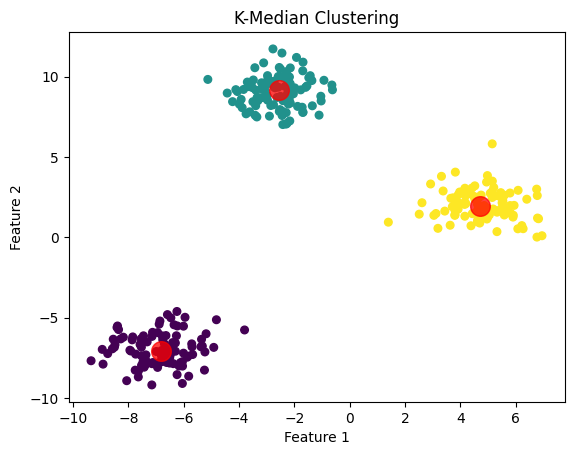

In [2]:
#KMedians without using KMedian library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min

# Step 1: Generate the dataset
n_samples = 300
n_features = 2
centers = 3
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=42)

# Step 2: Implement the K-Median algorithm
def k_median(X, n_clusters, max_iter=100):
    # Randomly initialize centroids by choosing random points from the dataset
    random_indices = np.random.choice(len(X), size=n_clusters, replace=False)
    centroids = X[random_indices]

    for _ in range(max_iter):
        # Assign each point to the nearest centroid based on Manhattan distance (L1 norm)
        labels, _ = pairwise_distances_argmin_min(X, centroids, metric='manhattan')

        # Compute the new centroids as the median of points in each cluster
        new_centroids = np.array([np.median(X[labels == i], axis=0) for i in range(n_clusters)])

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels
# Step 3: Apply the algorithm to the dataset
n_clusters = 3
centroids, labels = k_median(X, n_clusters)

# Step 4: Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Median Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
